# Data Preprocessing 

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv("column_3C_weka.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)


[[ 63.0278175   22.55258597  39.60911701  40.47523153  98.67291675
   -0.25439999]
 [ 39.05695098  10.06099147  25.01537822  28.99595951 114.4054254
    4.56425864]
 [ 68.83202098  22.21848205  50.09219357  46.61353893 105.9851355
   -3.53031731]
 ...
 [ 61.44659663  22.6949683   46.17034732  38.75162833 125.6707246
   -2.70787952]
 [ 45.25279209   8.69315736  41.5831264   36.55963472 118.5458418
    0.21475017]
 [ 33.84164075   5.07399141  36.64123294  28.76764934 123.9452436
   -0.19924909]]


In [4]:
print(y)

['Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spo

## Taking care of missing data

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 0:6])  # Fit on all columns that need imputation
X[:, 0:6] = imputer.transform(X[:, 0:6])

In [6]:
print(X)

[[ 63.0278175   22.55258597  39.60911701  40.47523153  98.67291675
   -0.25439999]
 [ 39.05695098  10.06099147  25.01537822  28.99595951 114.4054254
    4.56425864]
 [ 68.83202098  22.21848205  50.09219357  46.61353893 105.9851355
   -3.53031731]
 ...
 [ 61.44659663  22.6949683   46.17034732  38.75162833 125.6707246
   -2.70787952]
 [ 45.25279209   8.69315736  41.5831264   36.55963472 118.5458418
    0.21475017]
 [ 33.84164075   5.07399141  36.64123294  28.76764934 123.9452436
   -0.19924909]]


In [7]:
# Check for sparsity or near-zero values in features
df = pd.DataFrame(X, columns=dataset.columns[:-1])
for col in df.columns:
    print(f"Value counts for {col} (showing up to 10 most common values):")
    print(df[col].value_counts().head(10))
    num_zeros = (df[col] == 0).sum()
    print(f"Number of zeros: {num_zeros} ({num_zeros/len(df)*100:.1f}% of samples)")
    print('-'*40)

Value counts for pelvic_incidence (showing up to 10 most common values):
pelvic_incidence
63.027817    1
56.535051    1
54.920858    1
38.505273    1
48.259920    1
87.679087    1
74.094731    1
95.480229    1
80.111572    1
73.635962    1
Name: count, dtype: int64
Number of zeros: 0 (0.0% of samples)
----------------------------------------
Value counts for pelvic_tilt (showing up to 10 most common values):
pelvic_tilt
22.552586    1
14.377189    1
18.968430    1
16.964297    1
16.417462    1
20.365613    1
18.823727    1
46.550053    1
33.942432    1
9.711318     1
Name: count, dtype: int64
Number of zeros: 0 (0.0% of samples)
----------------------------------------
Value counts for lumbar_lordosis_angle (showing up to 10 most common values):
lumbar_lordosis_angle
52.0    4
42.0    4
47.0    4
35.0    4
37.0    3
34.0    3
58.0    3
44.0    2
51.0    2
40.0    2
Name: count, dtype: int64
Number of zeros: 0 (0.0% of samples)
----------------------------------------
Value counts for s

### Encoding the Dependent Variable

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [11]:
print(X_train)

[[ 61.44659663  22.6949683   46.17034732  38.75162833 125.6707246
   -2.70787952]
 [ 63.0278175   22.55258597  39.60911701  40.47523153  98.67291675
   -0.25439999]
 [ 69.62628302  21.12275138  52.76659472  48.50353164 116.8030913
   54.81686729]
 ...
 [ 84.97413208  33.02117462  60.85987263  51.95295747 125.6595336
   74.33340864]
 [ 63.92947003  19.97109671  40.17704963  43.95837332 113.0659387
  -11.05817866]
 [ 35.70345781  19.44325311  20.7         16.26020471 137.5406125
   -0.26348965]]


In [12]:
print(X_test)

[[ 67.41253785  17.44279712  60.14464036  49.96974073 111.12397
   33.15764573]
 [ 63.02630005  27.33624023  51.60501665  35.69005983 114.5066078
    7.4398698 ]
 [ 91.46874146  24.50817744  84.62027202  66.96056402 117.3078968
   52.62304673]
 [ 72.56070163  17.38519079  51.99999999  55.17551084 119.1937238
   32.10853735]
 [ 54.74177518  12.09507205  40.99999999  42.64670314 117.6432188
   40.3823266 ]
 [ 70.39930842  13.46998624  61.19999999  56.92932218 102.3375244
   25.53842852]
 [ 33.84164075   5.07399141  36.64123294  28.76764934 123.9452436
   -0.19924909]
 [ 72.05403412  24.70073725  79.87401586  47.35329687 107.1723576
   56.42615873]
 [ 84.99895554  29.61009772  83.35219438  55.38885782 126.9129899
   71.32117542]
 [ 69.3988184   18.89840693  75.96636144  50.50041147 103.5825398
   -0.44366081]
 [ 65.61180231  23.13791922  62.58217893  42.47388309 124.1280012
   -4.08329841]
 [ 45.25279209   8.69315736  41.5831264   36.55963472 118.5458418
    0.21475017]
 [ 43.20318499  19

In [13]:
print(y_train)

[1 0 2 2 2 2 2 2 2 2 2 1 1 0 2 2 2 1 0 2 2 1 0 2 2 2 0 1 0 1 2 2 1 2 0 2 1
 1 2 1 1 1 0 0 2 1 2 0 1 2 2 2 2 1 0 2 1 2 2 2 2 2 1 0 1 1 0 0 0 0 1 0 1 2
 0 0 1 2 1 1 2 2 2 1 1 1 0 1 1 0 0 2 2 0 2 0 1 2 1 2 2 2 1 2 1 0 2 2 2 2 1
 2 1 1 2 2 1 2 2 1 1 0 2 1 1 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 0
 0 0 2 1 0 1 0 1 2 0 1 0 1 1 2 2 1 1 1 2 1 1 0 2 1 0 0 2 2 1 2 2 2 2 2 1 2
 0 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 1 2 2 1 0 2 2 0 2 0 2 0 0 0 1 0 2 2 1 1 1
 2 0 0 0 2 2 1 1 2 0 2 1 1 1 2 1 1 2 2 2 2 2 1 2 1 0]


In [14]:
print(y_test)

[2 1 2 2 2 2 1 2 2 1 1 1 0 0 1 2 1 1 1 2 2 1 0 2 0 2 2 2 2 2 2 1 1 0 0 2 0
 1 2 2 1 1 2 1 2 2 1 1 2 1 2 1 0 2 2 0 2 2 0 2 0 2]


## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
print(X_train)

[[ 0.06676731  0.55096591 -0.31581494 -0.31561219  0.59294449 -0.74839697]
 [ 0.15935097  0.53651871 -0.6692242  -0.18879786 -1.58014878 -0.68669034]
 [ 0.5457044   0.39143676  0.03948044  0.40188538 -0.12082436  0.69838839]
 ...
 [ 1.44435183  1.59874181  0.47541077  0.65567734  0.59204371  1.18924228]
 [ 0.21214454  0.27458106 -0.63863349  0.06747476 -0.42163327 -0.95841251]
 [-1.44054525  0.22102201 -1.68773087 -1.97042165  1.54836922 -0.68691895]]


In [17]:
print(X_test)

[[ 4.16085166e-01  1.80404425e-02  4.36886027e-01  5.09761905e-01
  -5.77945185e-01  1.53644666e-01]
 [ 1.59262119e-01  1.02190487e+00 -2.30859405e-02 -5.40867498e-01
  -3.05671694e-01 -4.93174375e-01]
 [ 1.82462428e+00  7.34947986e-01  1.75522333e+00  1.75986397e+00
  -8.01918217e-02  6.43212351e-01]
 [ 7.17520510e-01  1.21952635e-02 -1.81085042e-03  8.92777126e-01
   7.16011673e-02  1.27258898e-01]
 [-3.25813476e-01 -5.24580657e-01 -5.94306704e-01 -2.90315504e-02
  -5.32012607e-02  3.35350159e-01]
 [ 5.90966590e-01 -3.85071345e-01  4.93731137e-01  1.02181403e+00
  -1.28517912e+00 -3.79836765e-02]
 [-1.54955839e+00 -1.23699322e+00 -8.29084105e-01 -1.05018476e+00
   4.54057985e-01 -6.85303258e-01]
 [ 6.87854109e-01  7.54486577e-01  1.49957450e+00  3.17256703e-01
  -8.96016280e-01  7.38863128e-01]
 [ 1.44580530e+00  1.25262785e+00  1.68692053e+00  9.08474158e-01
   6.92936249e-01  1.11348263e+00]
 [ 5.32385887e-01  1.65737750e-01  1.28909549e+00  5.48806074e-01
  -1.18496599e+00 -6.9145

# Exploratory Data Analysis (EDA)

## 1. Dimensionality Checks and Multicollinearity Analysis

Shape: (310, 6)
Number of features: 6
Unique labels: [0 1 2]


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


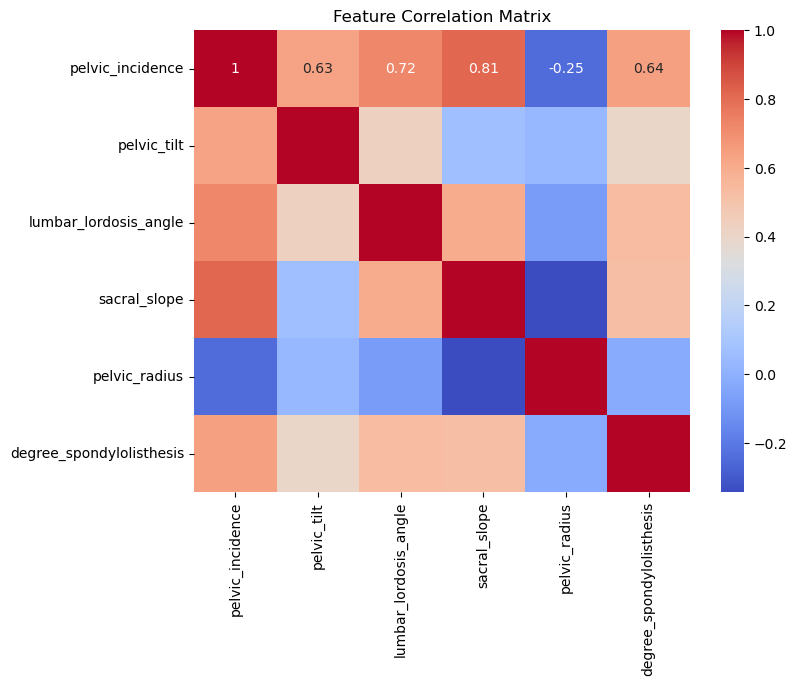

In [18]:
# Check shape and basic info
print('Shape:', X.shape)
print('Number of features:', X.shape[1])
print('Unique labels:', np.unique(y))

# Correlation matrix
corr_matrix = pd.DataFrame(X, columns=dataset.columns[:-1]).corr()
display(corr_matrix)

# Visualize correlation matrix
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

## 2. Assess Distribution Skewness and Apply Transformations

c:\Users\patri\anaconda3\Conda\envs\warui\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


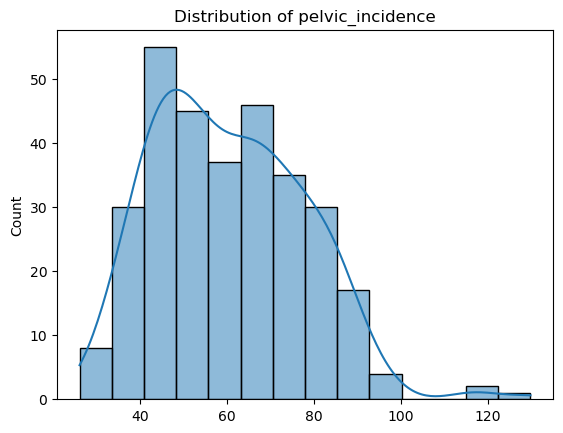

Skewness of pelvic_incidence: 0.52


c:\Users\patri\anaconda3\Conda\envs\warui\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


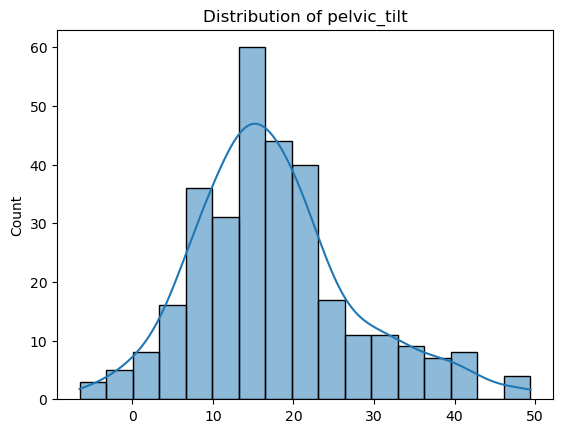

Skewness of pelvic_tilt: 0.67


c:\Users\patri\anaconda3\Conda\envs\warui\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


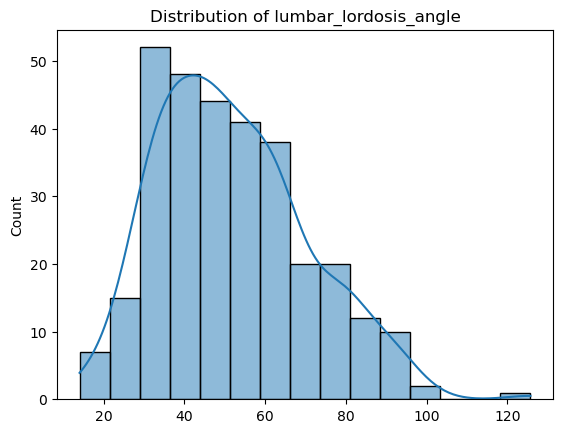

Skewness of lumbar_lordosis_angle: 0.60


c:\Users\patri\anaconda3\Conda\envs\warui\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


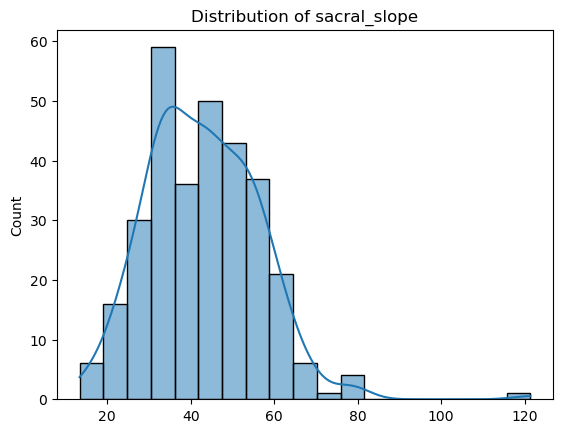

Skewness of sacral_slope: 0.79


c:\Users\patri\anaconda3\Conda\envs\warui\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


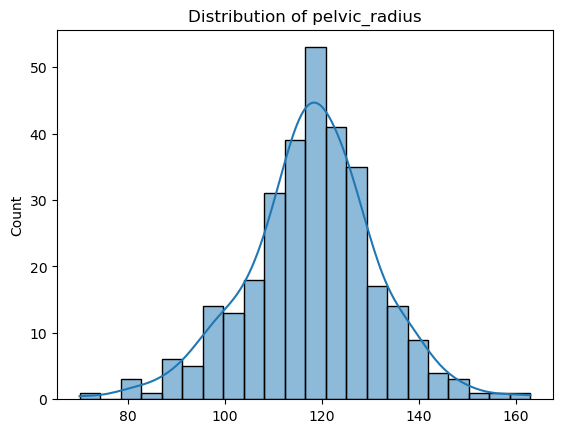

Skewness of pelvic_radius: -0.18


c:\Users\patri\anaconda3\Conda\envs\warui\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


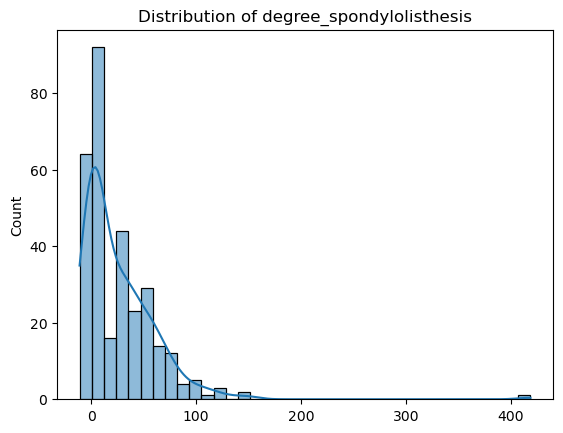

Skewness of degree_spondylolisthesis: 4.30
Skewness of pelvic_incidence (Original): 0.52
Skewness of pelvic_incidence (Transformed): 0.52


c:\Users\patri\anaconda3\Conda\envs\warui\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\patri\anaconda3\Conda\envs\warui\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


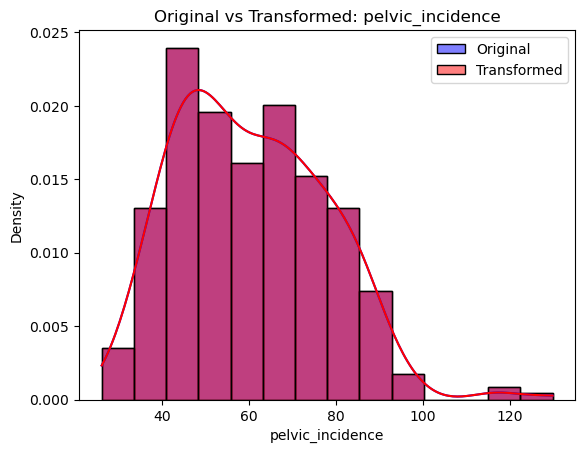

In [19]:
# Check skewness and plot distributions
import scipy.stats as stats
feature_names = dataset.columns[:-1]
for i, name in enumerate(feature_names):
    plt.figure()
    sns.histplot(X[:, i], kde=True)
    plt.title(f'Distribution of {name}')
    plt.show()
    skew = stats.skew(X[:, i])
    print(f'Skewness of {name}: {skew:.2f}')

# Example: Apply log1p transformation if skewness > 1 or < -1
X_transformed = X.copy()
for i in range(X.shape[1]):
    skew = stats.skew(X[:, i])
    if abs(skew) > 1:
        X_transformed[:, i] = np.log1p(np.abs(X[:, i])) * np.sign(X[:, i])

# Compare before/after for pelvic_incidence (first feature)
orig_skew = stats.skew(X[:, 0])
trans_skew = stats.skew(X_transformed[:, 0])
print(f"Skewness of {feature_names[0]} (Original): {orig_skew:.2f}")
print(f"Skewness of {feature_names[0]} (Transformed): {trans_skew:.2f}")
plt.figure()
sns.histplot(X[:, 0], color='blue', label='Original', kde=True, stat='density', alpha=0.5)
sns.histplot(X_transformed[:, 0], color='red', label='Transformed', kde=True, stat='density', alpha=0.5)
plt.legend()
plt.title(f'Original vs Transformed: {feature_names[0]}')
plt.xlabel(feature_names[0])
plt.show()

## 3. Explore Inter-feature Interactions and Feature Redundancy

c:\Users\patri\anaconda3\Conda\envs\warui\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\patri\anaconda3\Conda\envs\warui\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\patri\anaconda3\Conda\envs\warui\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\patri\anaconda3\Conda\envs\warui\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

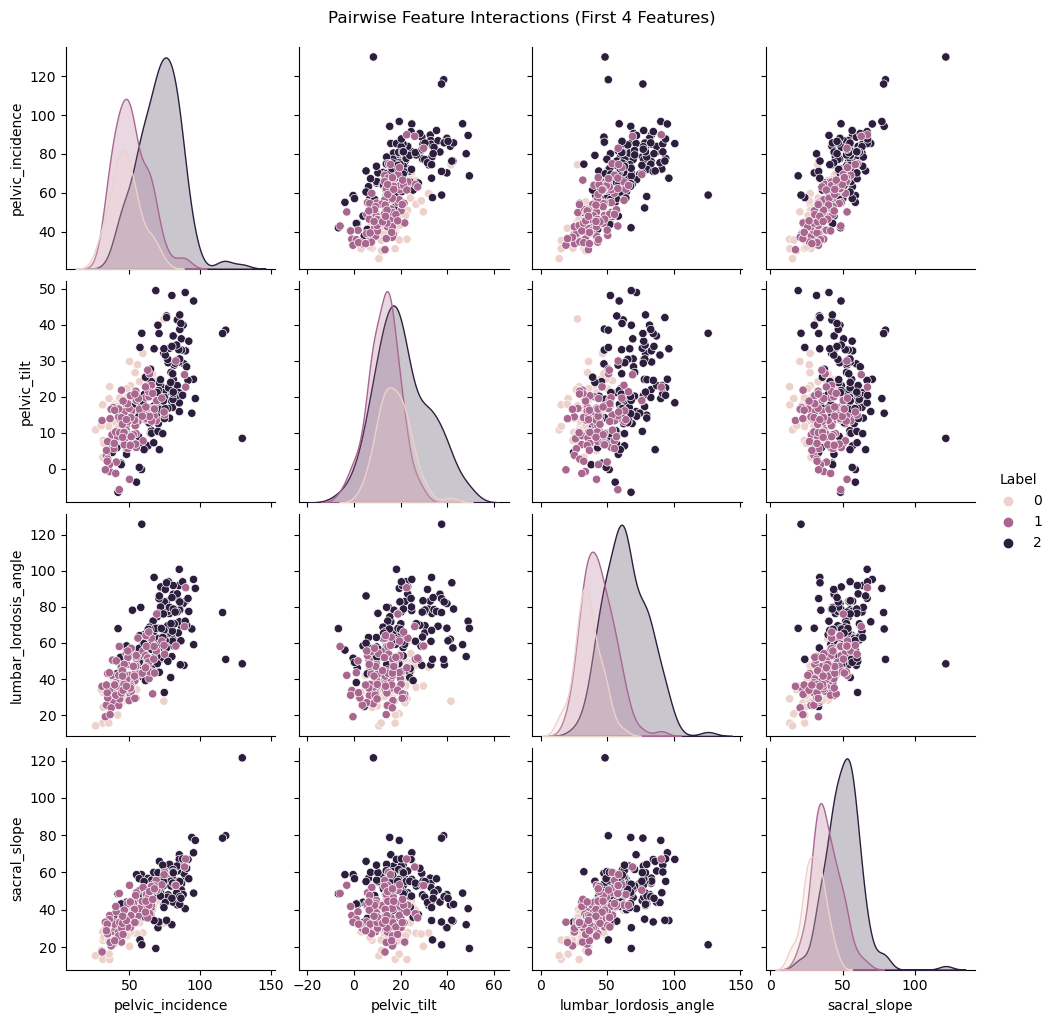

Highly correlated feature pairs (|corr| > 0.9):


In [20]:
# Pairplot for first 4 features
sns.pairplot(pd.DataFrame(X, columns=feature_names).iloc[:, :4].assign(Label=y), hue='Label')
plt.suptitle('Pairwise Feature Interactions (First 4 Features)', y=1.02)
plt.show()

# Check for redundancy (high correlation)
redundant = corr_matrix.abs() > 0.9
print('Highly correlated feature pairs (|corr| > 0.9):')
for i in range(len(feature_names)):
    for j in range(i+1, len(feature_names)):
        if redundant.iloc[i, j]:
            print(f'{feature_names[i]} & {feature_names[j]}: {corr_matrix.iloc[i, j]:.2f}')

## 4. Key Questions & Model/Feature Importance Discussion

**Can a neural network learn feature interactions better than tree-based models?**
- Neural networks can model complex, non-linear feature interactions via hidden layers and learned weights.
- Tree-based models (e.g., Random Forest, XGBoost) can also capture non-linearities and interactions, but may struggle with very high-dimensional or subtle interactions unless deep trees are used.
- Empirical comparison (e.g., via cross-validation) is needed to determine which works better for this dataset.

**Are non-linear relationships dominant across features like lumbar angle and pelvic incidence?**
- Pairplots and correlation analysis can reveal non-linear patterns.
- If scatterplots show curved or clustered relationships, non-linear models may be more appropriate.

**Which features contribute most to misclassifications or prediction errors?**
- Use feature importance from tree-based models or permutation importance.
- Analyze confusion matrix and error cases to see which features are most associated with misclassified samples.

**How do feature importances change when learned via embeddings vs. raw input?**
- Neural networks with embedding layers may learn different importances compared to raw input models.
- Compare feature importance from tree-based models (raw input) vs. neural network (e.g., via SHAP or integrated gradients).

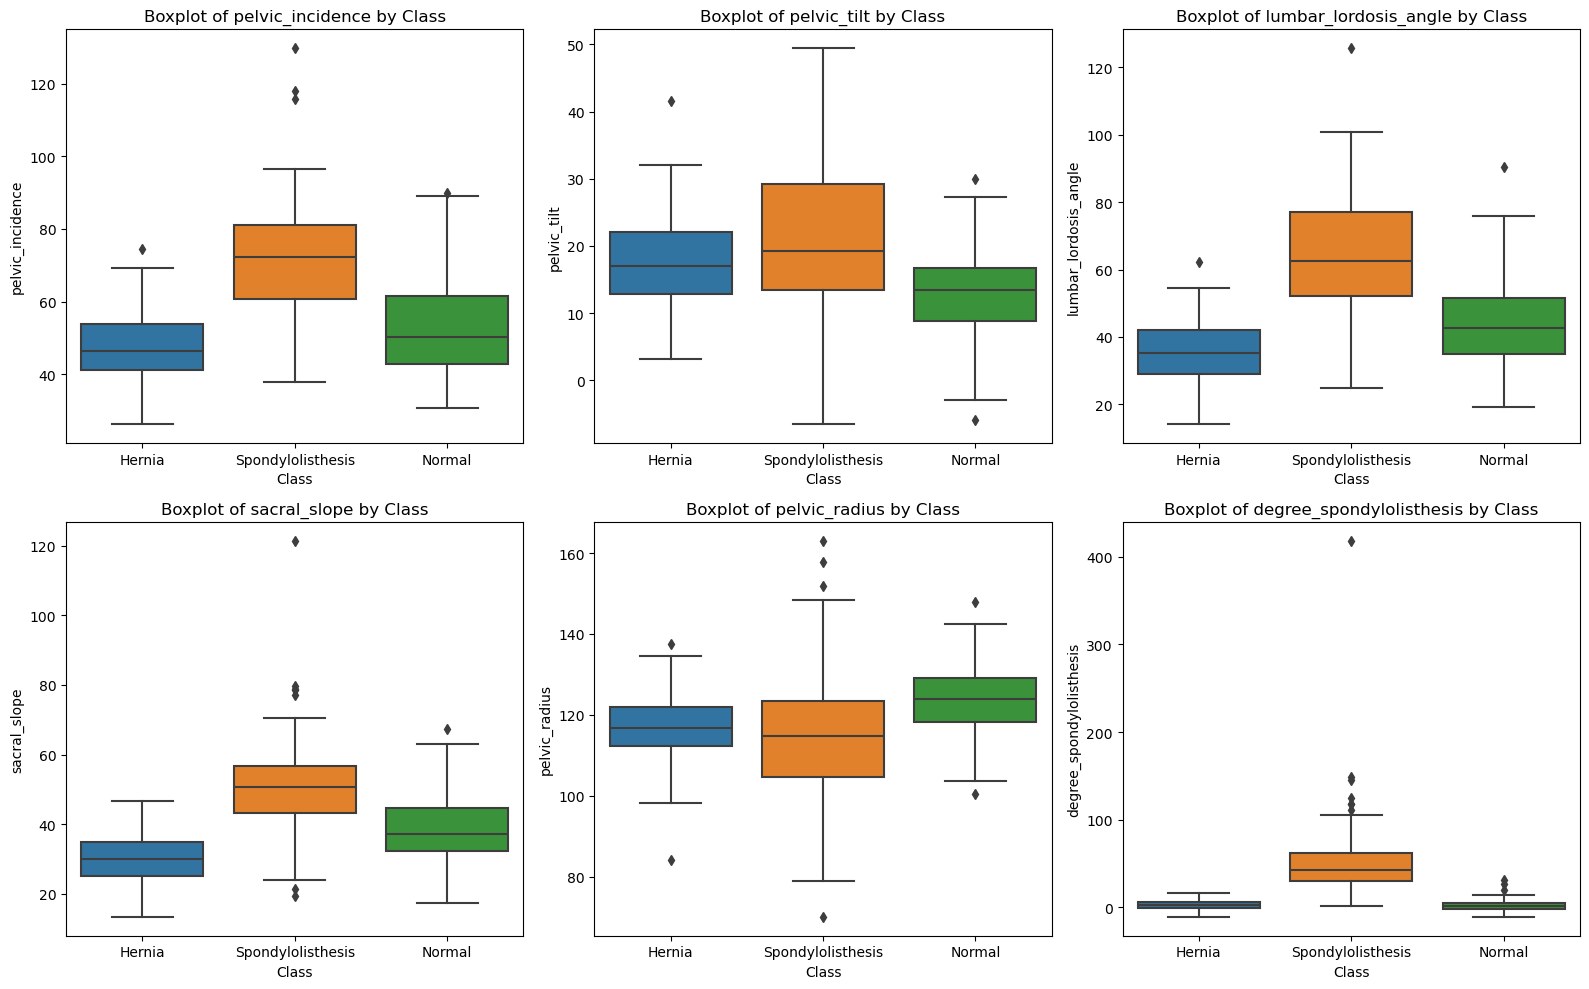

In [21]:
# Box plots for each feature by class label
df = pd.DataFrame(X, columns=dataset.columns[:-1])
df['Class'] = le.inverse_transform(y)
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f'Boxplot of {col} by Class')
plt.tight_layout()
plt.show()

#### Insights from the box plots for this dataset:

- Some features, such as pelvic_incidence and lumbar_lordosis_angle, show clear separation between classes, with distinct medians and ranges. This suggests these features are useful for classification.
- Other features, like sacral_slope, may have overlapping boxes between classes, indicating less discriminative power.
- Outliers are present in some classes, which could affect model performance or indicate data quality issues.
- The spread (interquartile range) varies by class for certain features, suggesting differences in variability that may be relevant for modeling.
- Overall, box plots help visually confirm which features are most informative for distinguishing between the spinal condition classes in this dataset.

## High-Cardinality Categorical Features & Embedding Encoding

**Step 1: Identify categorical features and their cardinality**

- Use `.select_dtypes(include=['object', 'category'])` to find categorical columns.
- Use `.nunique()` and `.value_counts()` to inspect cardinality.

**Step 2: Encoding for Embedding Layers**

- Map each category to a unique integer (e.g., with `LabelEncoder` or `pd.factorize`).
- For rare categories, consider grouping them as 'Other' to avoid overfitting.
- Embedding size rule-of-thumb: `min(50, (num_categories + 1) // 2)`.

**Example:**


In [22]:
# Identify categorical columns and their cardinality
cat_cols = dataset.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"{col}: {dataset[col].nunique()} unique values")
    print(dataset[col].value_counts().head())

# Example encoding for embedding layers
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    dataset[col + '_int'] = le.fit_transform(dataset[col])
    print(f"{col} mapped to integer IDs for embedding.")

# Embedding size suggestion
for col in cat_cols:
    n_cat = dataset[col].nunique()
    emb_dim = min(50, (n_cat + 1) // 2)
    print(f"Embedding size for '{col}': {emb_dim}")

class: 3 unique values
class
Spondylolisthesis    150
Normal               100
Hernia                60
Name: count, dtype: int64
class mapped to integer IDs for embedding.
Embedding size for 'class': 2


**Notes:**
- High-cardinality features are those with many unique values (e.g., >10).
- Integer encoding is required for embedding layers.
- Grouping rare categories can help prevent overfitting and reduce embedding size.

**`class: 3 unique values` means the 'class' column has 3 different categories: Spondylolisthesis, Normal, and Hernia.**
**The value counts show how many samples belong to each class.**
**`class mapped to integer IDs for embedding.` means each class label was converted to a unique integer (e.g., Spondylolisthesis=2, Normal=1, Hernia=0).**
**`Embedding size for 'class': 2` means that, following the rule-of-thumb (`min(50, (num_categories + 1) // 2)`), the recommended embedding vector size for this feature is 2.**

- None of the classes in the 'class' column have high cardinality.
- The 'class' feature has only 3 unique values: Spondylolisthesis, Normal, and Hernia.
- High cardinality typically refers to features with many unique categories (e.g., >10), which is not the case here.